<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Correlation between Singapore Weather Conditions and Construction Site Fatalities

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

* [Rainfall - Monthly Number of Rain Days]: Number of rain days in the month by Month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_134857f63c76d227b6fa045f31ce59c1/view)
* [Rainfall - Monthly Total]: Monthly total rainfall by Month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_b16d06b83473fdfcc92ed9d37b66ba58/view)
* [Rainfall - Monthly Highest Daily Total]: Highest daily rainfall in the month by Month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_53ffdaa97e48ce934cf92799d381f3b1/view)
* [Relative Humidity - Monthly Absolute Extreme Minimum]: Rh extremes minimum by Year-month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_54445baa32ffe4d46f5bef168c4e0538/view)
* [Sunshine Duration- Monthly Mean Daily Duration]: Monthly mean daily sunshine duration by Month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_9a80d732aa5de0a68be0557fc9437ad0/view)
* [Surface Air Temperature - Monthly Mean]: Surface air temperature monthly mean by Month (Jan 1982 to Jan 2024)
(https://beta.data.gov.sg/datasets/d_755290a24afe70c8f9e8bcbf9f251573/view)
* [Construction Fatalities]: Workplace Fatalities reported to the Ministry of Manpower (Jan 2021 to Jun 2023)(https://www.mom.gov.sg/-/media/mom/documents/safety-health/reports-stats/list-of-workplace-fatalities.pdf)

## Problem Statement

The construction industry faces a notable challenge in mitigating accidents and fatalities, with a significant correlation observed between adverse weather conditions and increased casualties on construction sites.

This research aims to analyse weather and accident data to identify the correlation between weather conditions and deaths among construction workers.

### Outside Research

1. **Relative Humidity**:
   - Singapore has high relative humidity, typically ranging from 70% to 90%. Construction workers in Singapore are likely accustomed to high humidity levels, but this does not eliminate the risk of heat-related illnesses, which can cause accidents.

2. **Monthly Rainfall**:
   - Heavy rainfall can cause slippery surfaces and poor visibility, leading to accidents on construction sites. The high rainfall can also cause flooding or water accumulation, which may pose additional risks.

3. **Monthly Mean Sunshine Hours**:
   - The intensity of sunlight can vary and prolonged exposure can lead to heat stress. Construction schedules may need to be adjusted to protect workers during periods of peak sunlight.

4. **Surface Air Temperature**:
   - The temperature in Singapore is consistently high, with daily temperatures often exceeding 30°C. Construction workers must manage their schedules to avoid the hottest parts of the day and stay hydrated and rested to prevent accidents due to heat exhaustion.

5. **Construction Workplace Fatalities 2021 to 2023**:
   - To analyse the correlation between weather conditions and workplace fatalities in the construction industry.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [112]:
# Code:
# Define the function to calculate the mean manually
def calculate_mean(values):
    # Ensure the list is not empty to avoid division by zero
    if not values:
        return None
    return sum(values) / len(values)

# Test the function with a list of numbers
test_values = [10, 20, 30, 40, 50]
mean_of_test_values = calculate_mean(test_values)
mean_of_test_values


30.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [113]:
# Code:
# Define the function to calculate the standard deviation manually
def calculate_std_dev(values):
    # Calculate the mean of the values using the previously defined function
    mean = calculate_mean(values)
    # Calculate the variance as the average of squared differences from the mean
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    # Standard deviation is the square root of the variance
    std_dev = variance ** 0.5
    return std_dev

# Test the function with the same list of numbers used to test the mean function
std_dev_of_test_values = calculate_std_dev(test_values)
std_dev_of_test_values


14.142135623730951

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [114]:
# Imports:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [115]:
# Code:
df_workplace_fatalities = pd.read_csv('../data/construction_workplace_fatalities_2021_to_2023.csv')

print(df_workplace_fatalities.head())
print(df_workplace_fatalities.info())

        Date  Fatalities        Industry
0  12-Jan-23           1    Construction
1  19-Jan-23           1           Other
2  31-Jan-23           1  Transportation
3   2-Feb-23           1    Construction
4  11-Feb-23           1  Transportation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        93 non-null     object
 1   Fatalities  93 non-null     int64 
 2   Industry    93 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.3+ KB
None


In [116]:
# Filter for 'Construction' industry and copy to avoid SettingWithCopyWarning
df_construction_fatalities = df_workplace_fatalities[df_workplace_fatalities['Industry'] == 'Construction'].copy()

# Ensure 'Date' column is in datetime format
df_construction_fatalities['Date'] = pd.to_datetime(df_construction_fatalities['Date'], format='%d-%b-%y')

# Find the start (min) and end (max) dates
start_date_dynamic = df_construction_fatalities['Date'].min()
end_date_dynamic = df_construction_fatalities['Date'].max()

start_date_dynamic = pd.to_datetime(start_date_dynamic)
end_date_dynamic = pd.to_datetime(end_date_dynamic)

print(start_date_dynamic, end_date_dynamic)

# Group by year and month, then create 'Year-Month' for easier sorting
df_construction_fatalities['Year-Month'] = df_construction_fatalities['Date'].dt.to_period('M')
grouped_construction_fatalities = df_construction_fatalities.groupby('Year-Month')['Fatalities'].sum().reset_index()

# Convert 'Year-Month' back to datetime for sorting (first day of each month representation)
grouped_construction_fatalities['Year-Month'] = grouped_construction_fatalities['Year-Month'].dt.to_timestamp()

# Sort by 'Year-Month'
grouped_construction_fatalities_sorted = grouped_construction_fatalities.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(grouped_construction_fatalities_sorted.head())
print(grouped_construction_fatalities_sorted.info())

2021-02-01 00:00:00 2023-06-15 00:00:00
  Year-Month  Fatalities
0 2021-02-01           3
1 2021-04-01           1
2 2021-05-01           2
3 2021-06-01           1
4 2021-07-01           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  22 non-null     datetime64[ns]
 1   Fatalities  22 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 484.0 bytes
None


In [117]:
# Code:
df_rain_monthly_highest = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')

print(df_rain_monthly_highest.head())
print(df_rain_monthly_highest.info())

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      505 non-null    object 
 1   maximum_rainfall_in_a_day  505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
None


In [118]:
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_rain_monthly_highest['month'] = pd.to_datetime(df_rain_monthly_highest['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_rain_monthly_highest.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_rain_monthly_highest_sorted = df_rain_monthly_highest.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_rain_monthly_highest_sorted.head())
print(df_rain_monthly_highest_sorted.info())

  Year-Month  maximum_rainfall_in_a_day
0 1982-01-01                       36.5
1 1982-02-01                        9.4
2 1982-03-01                       61.7
3 1982-04-01                       45.1
4 1982-05-01                       33.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year-Month                 505 non-null    datetime64[ns]
 1   maximum_rainfall_in_a_day  505 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB
None


In [119]:
# Code:
df_rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')

print(df_rain_days.head())
print(df_rain_days.info())

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             505 non-null    object
 1   no_of_rainy_days  505 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB
None


In [120]:
# Code
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_rain_days['month'] = pd.to_datetime(df_rain_days['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_rain_days.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_rain_days_sorted = df_rain_days.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_rain_days_sorted.head())
print(df_rain_days_sorted.info())

  Year-Month  no_of_rainy_days
0 1982-01-01                10
1 1982-02-01                 5
2 1982-03-01                11
3 1982-04-01                14
4 1982-05-01                10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year-Month        505 non-null    datetime64[ns]
 1   no_of_rainy_days  505 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.0 KB
None


In [121]:
# Code:
df_rainfall_monthly_total = pd.read_csv('../data/rainfall-monthly-total.csv')

print(df_rainfall_monthly_total.head())
print(df_rainfall_monthly_total.info())

     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           505 non-null    object 
 1   total_rainfall  505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
None


In [122]:
# Code
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_rainfall_monthly_total['month'] = pd.to_datetime(df_rainfall_monthly_total['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_rainfall_monthly_total.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_rainfall_monthly_total_sorted = df_rainfall_monthly_total.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_rainfall_monthly_total_sorted.head())
print(df_rainfall_monthly_total_sorted.info())

  Year-Month  total_rainfall
0 1982-01-01           107.1
1 1982-02-01            27.8
2 1982-03-01           160.8
3 1982-04-01           157.0
4 1982-05-01           102.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year-Month      505 non-null    datetime64[ns]
 1   total_rainfall  505 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB
None


In [123]:
# Code:
df_relative_humidity_monthly_total = pd.read_csv('../data/relative-humidity-monthly-mean.csv')

print(df_relative_humidity_monthly_total.head())
print(df_relative_humidity_monthly_total.info())

     month  rh_extremes_minimum
0  1982-01                   49
1  1982-02                   49
2  1982-03                   51
3  1982-04                   54
4  1982-05                   57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                505 non-null    object
 1   rh_extremes_minimum  505 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB
None


In [124]:
# Code:
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_relative_humidity_monthly_total['month'] = pd.to_datetime(df_relative_humidity_monthly_total['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_relative_humidity_monthly_total.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_relative_humidity_monthly_total_sorted = df_relative_humidity_monthly_total.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_relative_humidity_monthly_total_sorted.head())
print(df_relative_humidity_monthly_total_sorted.info())

  Year-Month  rh_extremes_minimum
0 1982-01-01                   49
1 1982-02-01                   49
2 1982-03-01                   51
3 1982-04-01                   54
4 1982-05-01                   57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year-Month           505 non-null    datetime64[ns]
 1   rh_extremes_minimum  505 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.0 KB
None


In [125]:
# Code:
df_sunshine_duration = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')

print(df_sunshine_duration.head())
print(df_sunshine_duration.info())

     month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              505 non-null    object 
 1   mean_sunshine_hrs  505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
None


In [126]:
# Code:
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_sunshine_duration['month'] = pd.to_datetime(df_sunshine_duration['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_sunshine_duration.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_sunshine_duration_sorted = df_sunshine_duration.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_sunshine_duration_sorted.head())
print(df_sunshine_duration_sorted.info())

  Year-Month  mean_sunshine_hrs
0 1982-01-01                5.6
1 1982-02-01                7.6
2 1982-03-01                5.1
3 1982-04-01                4.7
4 1982-05-01                5.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year-Month         505 non-null    datetime64[ns]
 1   mean_sunshine_hrs  505 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB
None


In [127]:
# Code:
df_surface_air_temperature = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')

print(df_surface_air_temperature.head())
print(df_surface_air_temperature.info())

     month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      505 non-null    object 
 1   mean_temp  505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
None


In [128]:
# Code:
# Ensure 'month' column is in datetime format (assuming it's in '%Y-%m' format)
df_surface_air_temperature['month'] = pd.to_datetime(df_surface_air_temperature['month'], format='%Y-%m')

# Rename 'month' to 'Year-Month' for clarity
df_surface_air_temperature.rename(columns={'month': 'Year-Month'}, inplace=True)

# Now, sort by 'Year-Month'
df_surface_air_temperature_sorted = df_surface_air_temperature.sort_values(by='Year-Month')

# Display the sorted DataFrame
print(df_surface_air_temperature_sorted.head())
print(df_surface_air_temperature_sorted.info())

  Year-Month  mean_temp
0 1982-01-01       25.9
1 1982-02-01       27.1
2 1982-03-01       27.2
3 1982-04-01       27.0
4 1982-05-01       28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  505 non-null    datetime64[ns]
 1   mean_temp   505 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB
None


In [129]:
# Merge the construction fatalities dataset with the weather datasets

merged_dataset0 = df_rain_days_sorted.merge(df_rainfall_monthly_total_sorted, how='left')
merged_dataset1 = merged_dataset0.merge(df_rain_monthly_highest_sorted, how='left')
merged_dataset2 = merged_dataset1.merge(df_rain_days_sorted, how='left')
merged_dataset3 = merged_dataset2.merge(df_relative_humidity_monthly_total_sorted, how='left')
merged_dataset4 = merged_dataset3.merge(df_sunshine_duration_sorted, how='left')
merged_dataset5 = merged_dataset4.merge(df_surface_air_temperature_sorted, how='left')
merged_dataset_final = merged_dataset5.merge(grouped_construction_fatalities_sorted, how='left')

# Assuming your final merged dataset is stored in a variable named 'merged_dataset'
# Specify the file path where you want to save the CSV file
file_path = '../data/merged_dataset.csv'

# Output the merged dataset to a CSV file
merged_dataset_final.to_csv(file_path, index=False)

# Provide feedback to the user
print(f'Merged dataset has been saved to: {file_path}')

# Display the merged dataset
print(merged_dataset_final.head())
print(merged_dataset_final.info())

Merged dataset has been saved to: ../data/merged_dataset.csv
  Year-Month  no_of_rainy_days  total_rainfall  maximum_rainfall_in_a_day  \
0 1982-01-01                10           107.1                       36.5   
1 1982-02-01                 5            27.8                        9.4   
2 1982-03-01                11           160.8                       61.7   
3 1982-04-01                14           157.0                       45.1   
4 1982-05-01                10           102.2                       33.0   

   rh_extremes_minimum  mean_sunshine_hrs  mean_temp  Fatalities  
0                   49                5.6       25.9         NaN  
1                   49                7.6       27.1         NaN  
2                   51                5.1       27.2         NaN  
3                   54                4.7       27.0         NaN  
4                   57                5.8       28.0         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Da

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Year-Month|datetime64[ns]|All|The month and year for the recorded data, formatted as YYYY-MM-DD.|
|Fatalities|int64|construction_workplace_fatalities_2021_to_2023|The number of construction fatalities recorded.|
|maximum_rainfall_in_a_day|float64|rainfall-monthly-highest-daily-total|The maximum rainfall recorded in a single day, in millimeters.|
|no_of_rainy_days|int64|rainfall-monthly-number-of-rain-days|The number of days with rainfall.|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm|
|rh_extremes_minimum|int64|relative-humidity-monthly-mean|The minimum recorded extreme relative humidity, in percentage.|
|mean_sunshine_hrs|float64|sunshine-duration-monthly-mean-daily-duration|The average number of sunshine hours per day.|
|mean_temp|float64|surface-air-temperature-monthly-mean|The average temperature during the period, in degrees Celsius.|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [130]:
#Code:
# 1. Summary Statistics
summary_statistics = round(merged_dataset_final.describe(), 2)
summary_statistics

,Year-Month,no_of_rainy_days,total_rainfall,maximum_rainfall_in_a_day,rh_extremes_minimum,mean_sunshine_hrs,mean_temp,Fatalities
count,505,505.00,505.0,505.00,505.00,505.00,505.00,22.00
mean,2002-12-31 10:01:39.801980160,14.16,178.8,52.61,50.41,5.67,27.69,1.55
min,1982-01-01 00:00:00,1.00,0.2,0.20,33.00,2.70,25.40,1.00
25%,1992-07-01 00:00:00,11.00,96.8,31.00,47.00,4.80,27.10,1.00
50%,2003-01-01 00:00:00,14.00,160.3,44.20,51.00,5.70,27.70,1.00
75%,2013-07-01 00:00:00,18.00,239.8,63.30,55.00,6.40,28.30,2.00
max,2024-01-01 00:00:00,27.00,765.9,216.20,61.00,9.30,29.50,3.00
std,NaN,4.99,113.8,35.60,5.56,1.21,0.81,0.67


In [131]:
#Code:
# 2. Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. No loops.

def calculate_mean(values):
    """Calculate the mean of a list of values."""
    if not values:
        return None
    return sum(values) / len(values)

def calculate_std_dev(values):
    """Calculate the standard deviation of a list of values."""
    mean = calculate_mean(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    std_dev = variance ** 0.5
    return std_dev

# Apply the standard deviation function to each numeric column in the dataframe using dictionary comprehension
sd_manual = {column: round(calculate_std_dev(merged_dataset_final[column].dropna().tolist()), 2) for column in merged_dataset_final.select_dtypes(include=['float64', 'int64']).columns}

sd_manual


{'no_of_rainy_days': 4.98,
 'total_rainfall': 113.69,
 'maximum_rainfall_in_a_day': 35.57,
 'rh_extremes_minimum': 5.56,
 'mean_sunshine_hrs': 1.21,
 'mean_temp': 0.81,
 'Fatalities': 0.66}

In [132]:
# 3. Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
years_of_interest = [1990, 2000, 2010, 2020]
rainfall_extremes = {}

merged_dataset_final['Year'] = merged_dataset_final['Year-Month'].dt.year
merged_dataset_final['Month'] = merged_dataset_final['Year-Month'].dt.month

for year in years_of_interest:
    year_data = merged_dataset_final[merged_dataset_final['Year'] == year]
    max_rainfall = year_data.loc[year_data['total_rainfall'].idxmax()]
    min_rainfall = year_data.loc[year_data['total_rainfall'].idxmin()]
    rainfall_extremes[year] = {
        'Highest Total Rainfall': {'Month': max_rainfall['Month'], 'Value': max_rainfall['total_rainfall']},
        'Lowest Total Rainfall': {'Month': min_rainfall['Month'], 'Value': min_rainfall['total_rainfall']}
    }

rainfall_extremes


{1990: {'Highest Total Rainfall': {'Month': 9, 'Value': 204.5},
  'Lowest Total Rainfall': {'Month': 2, 'Value': 24.1}},
 2000: {'Highest Total Rainfall': {'Month': 11, 'Value': 385.7},
  'Lowest Total Rainfall': {'Month': 9, 'Value': 81.1}},
 2010: {'Highest Total Rainfall': {'Month': 7, 'Value': 298.5},
  'Lowest Total Rainfall': {'Month': 2, 'Value': 6.3}},
 2020: {'Highest Total Rainfall': {'Month': 5, 'Value': 255.6},
  'Lowest Total Rainfall': {'Month': 2, 'Value': 65.0}}}

In [133]:
# 4 Which year have the highest and lowest total rainfall in the date range of analysis?
yearly_total_rainfall = merged_dataset_final.groupby('Year')['total_rainfall'].sum().reset_index()

# Identify the year with the highest and lowest total rainfall
max_total_rainfall_year = yearly_total_rainfall.loc[yearly_total_rainfall['total_rainfall'].idxmax()]
min_total_rainfall_year = yearly_total_rainfall.loc[yearly_total_rainfall['total_rainfall'].idxmin()]

max_total_rainfall_year, min_total_rainfall_year


(Year              2007.0
 total_rainfall    2886.2
 Name: 25, dtype: float64,
 Year              2024.0
 total_rainfall     499.6
 Name: 42, dtype: float64)

In [134]:
# 5 Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
rainy_days_extremes = {}

for year in years_of_interest:
    year_data = merged_dataset_final[merged_dataset_final['Year'] == year]
    max_rainy_days = year_data.loc[year_data['no_of_rainy_days'].idxmax()]
    min_rainy_days = year_data.loc[year_data['no_of_rainy_days'].idxmin()]
    rainy_days_extremes[year] = {
        'Most Rainy Days': {'Month': max_rainy_days['Month'], 'Value': max_rainy_days['no_of_rainy_days']},
        'Least Rainy Days': {'Month': min_rainy_days['Month'], 'Value': min_rainy_days['no_of_rainy_days']}
    }

rainy_days_extremes



{1990: {'Most Rainy Days': {'Month': 9, 'Value': 17},
  'Least Rainy Days': {'Month': 3, 'Value': 4}},
 2000: {'Most Rainy Days': {'Month': 11, 'Value': 21},
  'Least Rainy Days': {'Month': 5, 'Value': 10}},
 2010: {'Most Rainy Days': {'Month': 11, 'Value': 21},
  'Least Rainy Days': {'Month': 2, 'Value': 4}},
 2020: {'Most Rainy Days': {'Month': 7, 'Value': 22},
  'Least Rainy Days': {'Month': 1, 'Value': 6}}}

In [135]:
# 6 Which year have the highest and lowest number of rainy days in the date range of analysis?
yearly_rainy_days = merged_dataset_final.groupby('Year')['no_of_rainy_days'].sum().reset_index()

# Identify the year with the highest and lowest number of rainy days
max_rainy_days_year = yearly_rainy_days.loc[yearly_rainy_days['no_of_rainy_days'].idxmax()]
min_rainy_days_year = yearly_rainy_days.loc[yearly_rainy_days['no_of_rainy_days'].idxmin()]

max_rainy_days_year, min_rainy_days_year


(Year                2022
 no_of_rainy_days     210
 Name: 40, dtype: int64,
 Year                2024
 no_of_rainy_days      21
 Name: 42, dtype: int64)

In [146]:
# 7 Are there any outliers months in the dataset?

"""
To identify any outliers in terms of total rainfall and the number of rainy days, we'll use statistical methods.
Specifically, we can look at values that fall beyond the typical range of 1.5 times the interquartile range (IQR) from the quartiles.

First identify outliers in the total rainfall and number of rainy days across the entire dataset.
"""

# Define a function to detect outliers based on the IQR method
def detect_outliers(data, column):
    Q1 = merged_dataset_final[column].quantile(0.25)
    Q3 = merged_dataset_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged_dataset_final[(merged_dataset_final[column] < lower_bound) | (merged_dataset_final[column] > upper_bound)]
    return outliers

# Detect outliers for total_rainfall and no_of_rainy_days
outliers_total_rainfall = detect_outliers(merged_dataset_final, 'total_rainfall')
outliers_rainy_days = detect_outliers(merged_dataset_final, 'no_of_rainy_days')

# Number of outliers detected
num_outliers_total_rainfall = outliers_total_rainfall.shape[0]
num_outliers_rainy_days = outliers_rainy_days.shape[0]

num_outliers_total_rainfall, num_outliers_rainy_days

# Outliers Analysis:
# Total Rainfall: There are 16 outlier months detected based on the total rainfall amounts, indicating these months had significantly higher or lower rainfall than the typical range.
# Number of Rainy Days: No outlier months were detected based on the number of rainy days, suggesting that the distribution of rainy days does not have extreme values beyond the typical range set by the IQR method.

(16, 0)

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


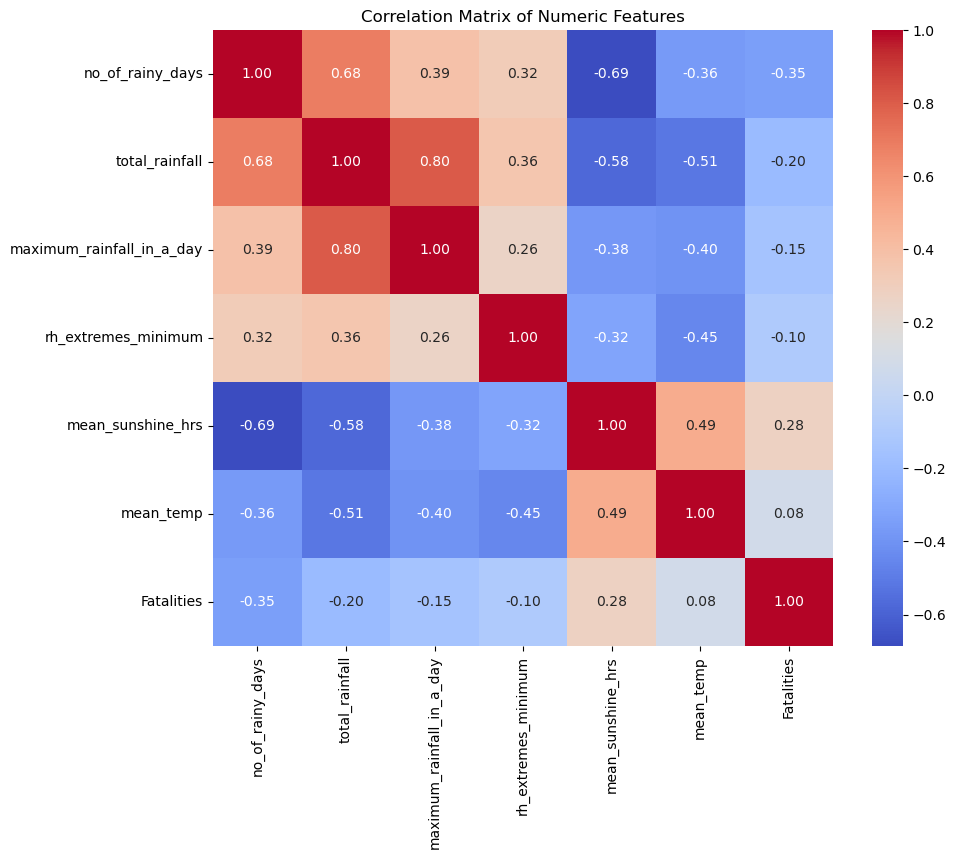

In [137]:
# Check if 'Year-Month', 'Year' and 'Month' columns are in the dataset before dropping
columns_to_drop = [col for col in ['Year-Month', 'Year', 'Month'] if col in merged_dataset_final.columns]
merged_dataset_final.drop(columns=columns_to_drop, axis=1, inplace=True)

# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features
correlation_matrix = merged_dataset_final.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [138]:
# Calculate the correlation matrix to specifically look at the correlation between Fatalities and other variables
correlation_matrix = merged_dataset_final.corr()

# Display the correlation values between Fatalities and other variables
correlation_with_fatalities = correlation_matrix['Fatalities'].sort_values(ascending=False)
correlation_with_fatalities


Fatalities                   1.000000
mean_sunshine_hrs            0.278902
mean_temp                    0.078550
rh_extremes_minimum         -0.095705
maximum_rainfall_in_a_day   -0.149319
total_rainfall              -0.202215
no_of_rainy_days            -0.345240
Name: Fatalities, dtype: float64

Fatalities & Mean Sunshine Hours (0.279): The positive correlation could indicate that more sunshine hours, potentially leading to hotter conditions, might increase the risk of heat-related incidents in construction settings. Construction activities might not cease under sunny conditions, possibly elevating the risk of heatstroke or dehydration.

Fatalities & Mean Temperature (0.079): Although the correlation is slight, higher temperatures might contribute to a riskier environment for construction workers due to heat stress. The impact is relatively minor, suggesting other factors significantly contribute to fatalities.

Fatalities & Minimum Relative Humidity (-0.096): The negative correlation here could reflect that lower humidity, often associated with hotter days, marginally affects safety. However, its impact is relatively weak, suggesting that humidity alone isn't a significant risk factor in construction fatalities.

Fatalities & Total Rainfall (-0.202): This negative correlation might imply that periods of higher rainfall, potentially slowing down construction activities or leading to work stoppages, are associated with fewer fatalities. Rainfall could naturally reduce the risk by limiting exposure to other hazardous conditions or work-related risks.

Fatalities & Number of Rainy Days (-0.345): The strongest negative correlation suggests that more rainy days, which might also lead to less active construction work outdoors, correlate with fewer fatalities. This could be due to reduced work pace or postponed activities during wet weather, indirectly reducing exposure to risks.

Industry-Specific Observations:
The correlations observed suggest that extreme heat and continuous work under sunny conditions might slightly increase risk, whereas rainy conditions might lead to safer outcomes, possibly by reducing the amount of active construction work.

/Users/clarencemun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


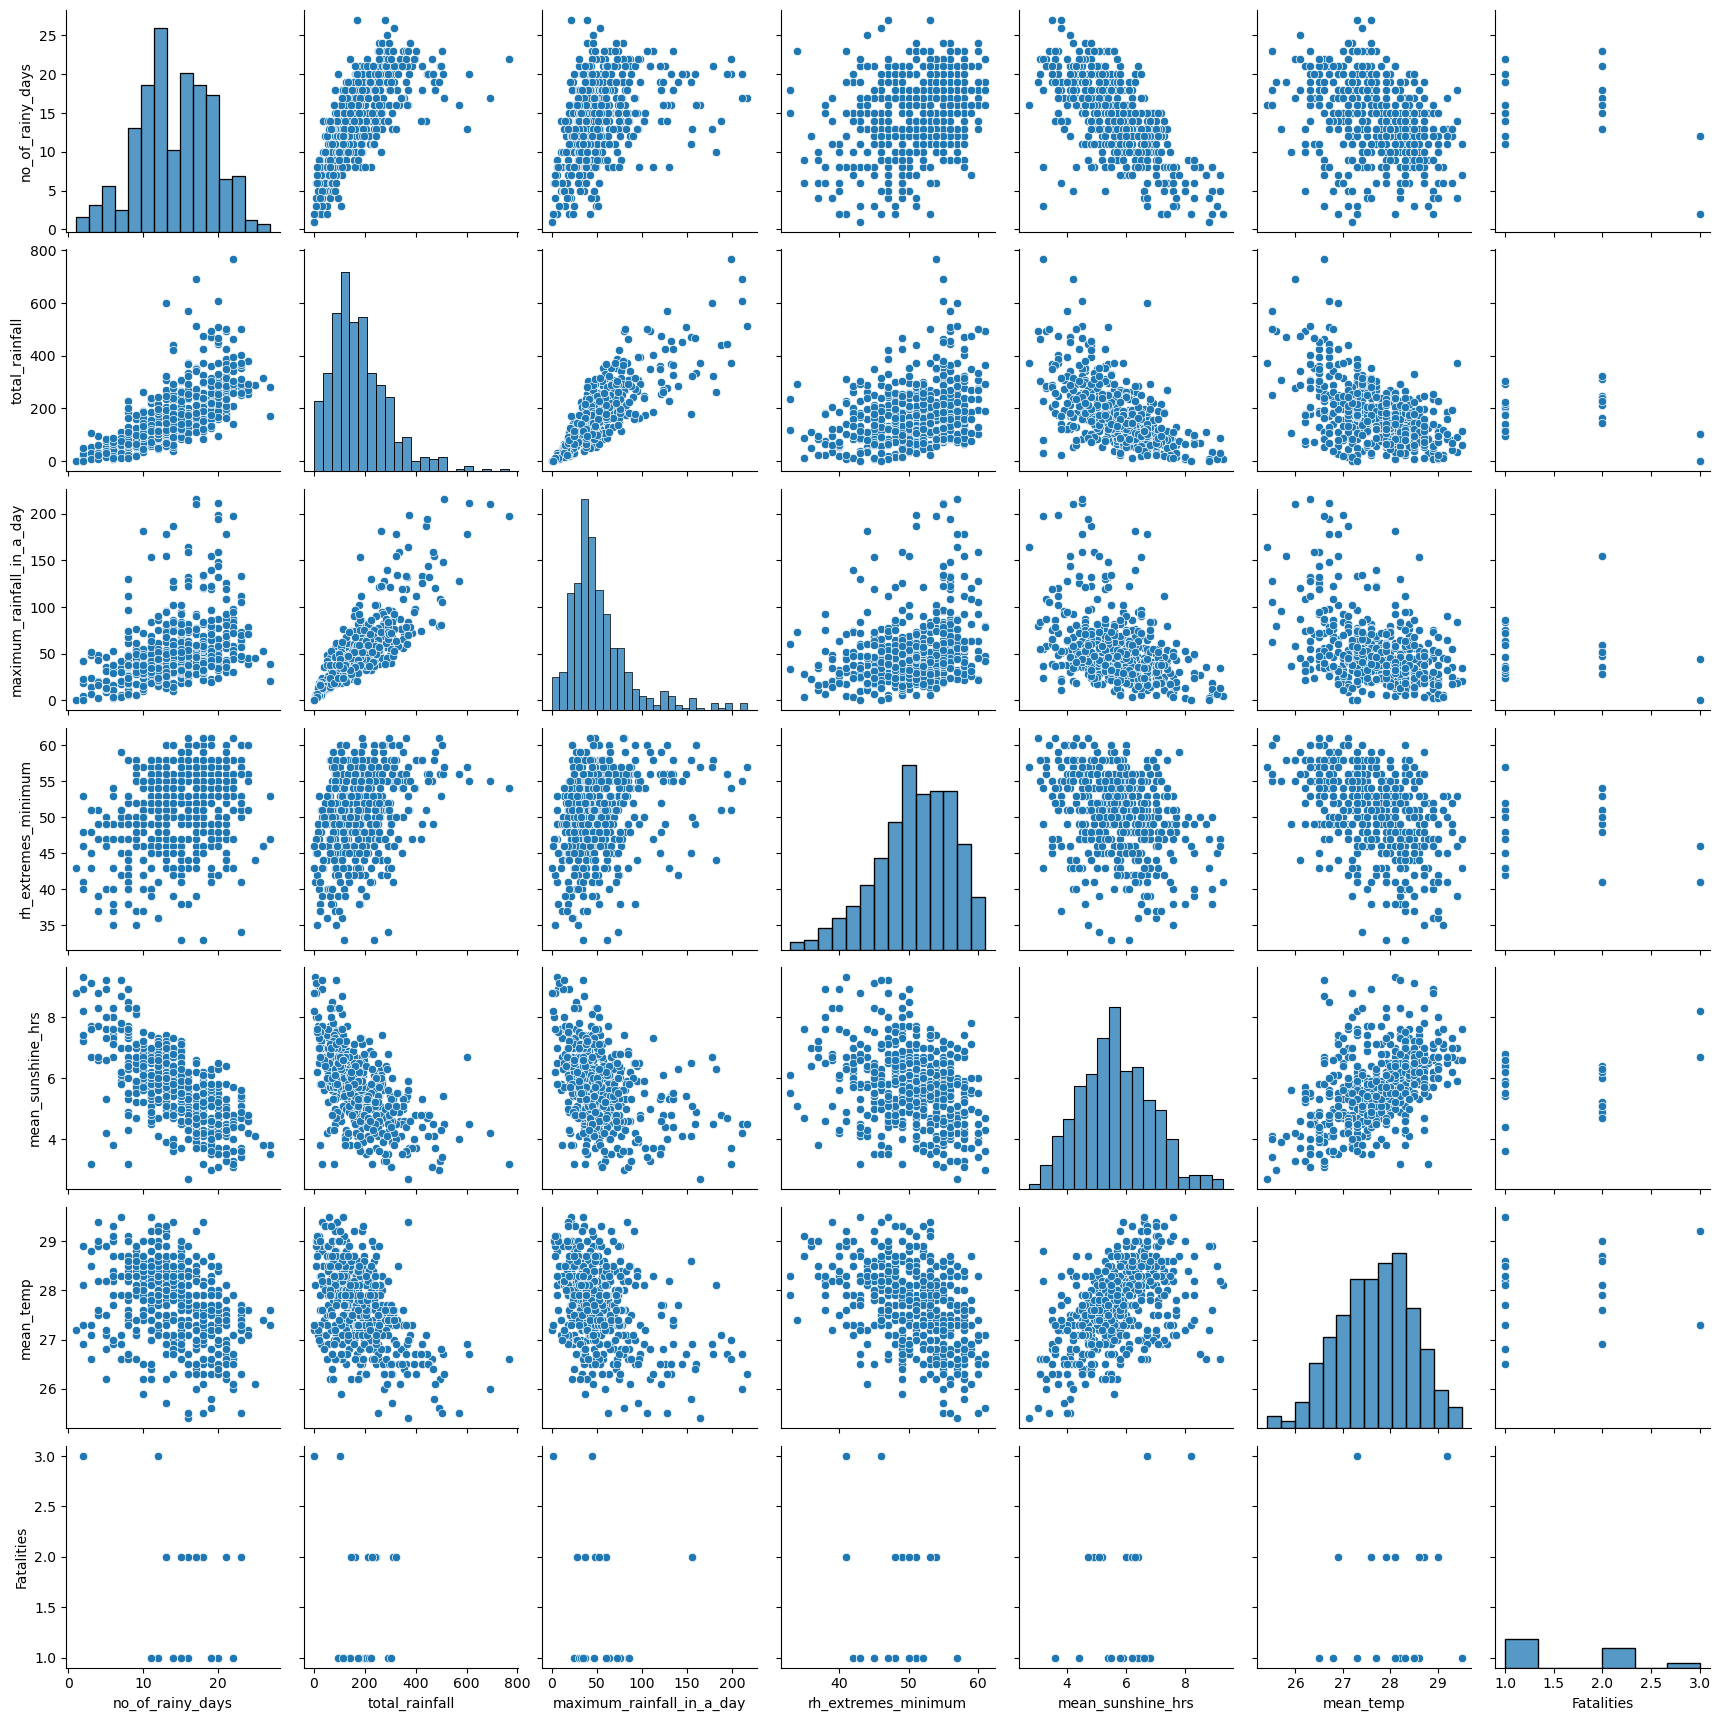

In [139]:
# Use seaborn's pairplot function to create pairplots for the cleaned dataset
sns.pairplot(merged_dataset_final)
plt.show()


This plot provides a visualization of the pairwise relationships between all the variables in the dataset. For each pair of variables, it shows a scatter plot if both variables are numerical, and for each variable with itself, it shows the distribution of that variable, often as a histogram.

From this pairplot, one can observe the following:
Histograms (Diagonal Plots):

The histogram for no_of_rainy_days appears slightly right-skewed, indicating more months with fewer rainy days.

The total_rainfall histogram is also right-skewed, suggesting that higher amounts of total rainfall are less common.

rh_extremes_minimum shows a relatively normal distribution, with a peak around the 50 mark.

mean_sunshine_hrs seems to have a left-skewed distribution, indicating more months with higher sunshine hours.

The mean_temp distribution appears quite normal, centered around 28 degrees Celsius.

Fatalities show a right-skewed distribution, with most values clustered at the lower end, indicating that higher numbers of fatalities are less frequent.


Scatter Plots (Off-Diagonal Plots):

no_of_rainy_days vs. total_rainfall: There is a visible positive correlation, as expected—more rainy days generally correspond to higher total rainfall.

no_of_rainy_days vs. mean_sunshine_hrs: As the number of rainy days increases, the mean sunshine hours tend to decrease, showing a negative correlation.

mean_temp vs. mean_sunshine_hrs: There is a cluster of points that suggests a moderate positive correlation—higher temperatures seem to coincide with more sunshine hours.

Fatalities scatter plots: There are no clear patterns or strong correlations observable with other variables in the scatter plots involving fatalities. The points are fairly dispersed, suggesting other factors not included in this dataset may be influencing the number of fatalities.


Outliers:

In several scatter plots, there are points that lie far away from the main clusters, suggesting potential outliers in the data that could be worth investigating further.


Trends:

No strong linear trends are observed in the scatter plots involving fatalities, which implies that the relationship, if any, is not simply linear or may be influenced by other variables not captured in this dataset.

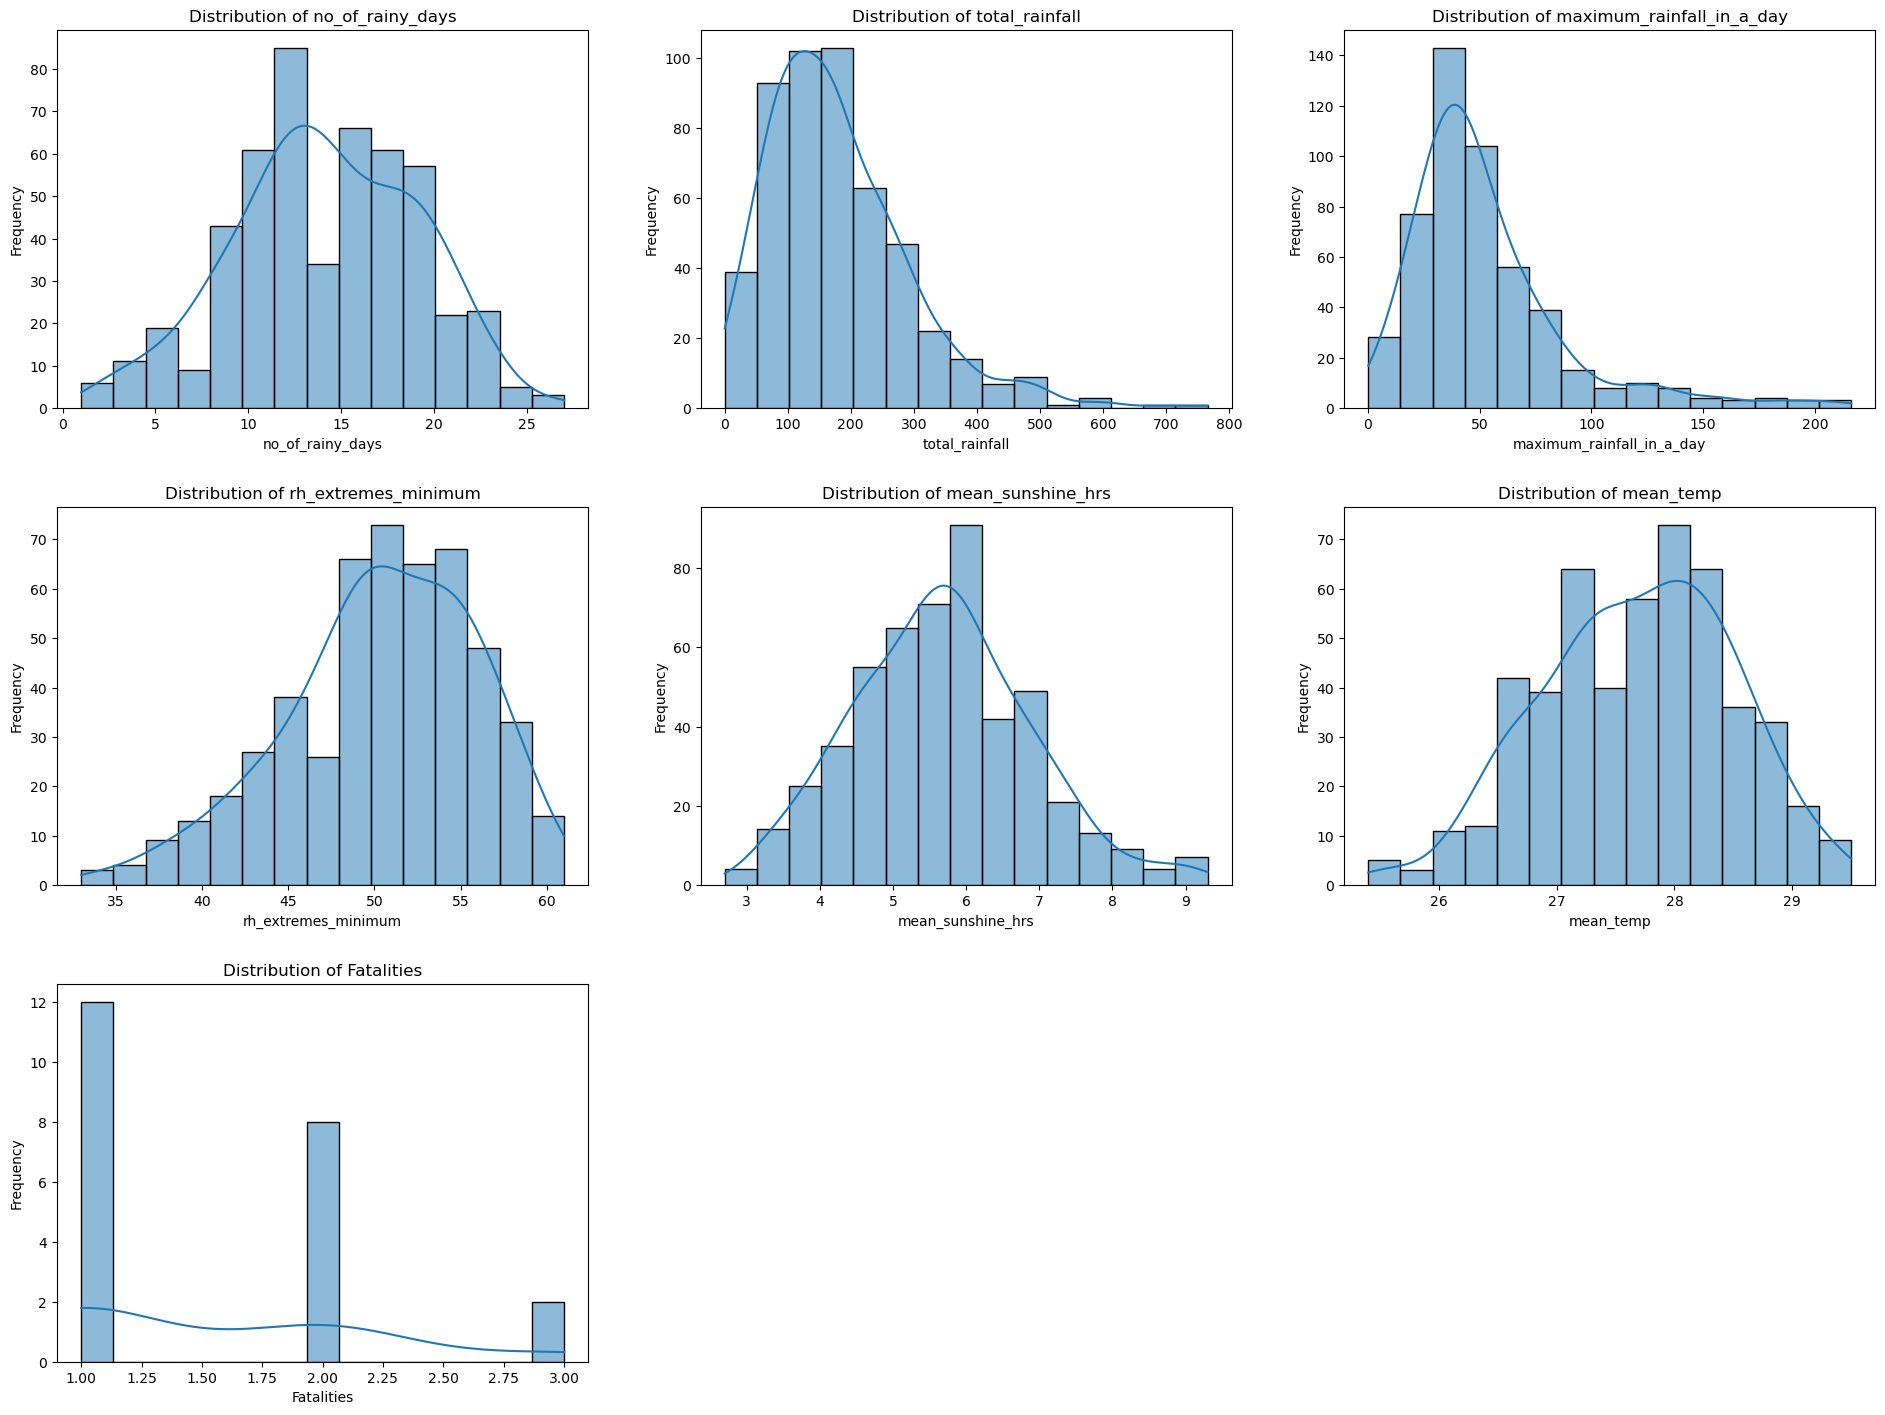

In [140]:
"""

2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
OPTIONAL: Summarize the underlying distributions of your features (in words & statistics)
Be thorough in your verbal description of these distributions.
Be sure to back up these summaries with statistics.
We generally assume that data we sample from a population will be normally distributed.
Do we observe this trend?
Explain your answers for each distribution and how you think this will affect estimates made from these data.

"""

# Define the function again to ensure it's available
def plot_histograms(dataframe, columns, bins=10, figsize=(20, 15)):
    nrows = len(columns) // 3 + (1 if len(columns) % 3 else 0)  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=figsize)
    fig.tight_layout(pad=5.0)

    for i, column in enumerate(columns):
        # Calculate position in the grid
        row = i // 3
        col = i % 3

        if nrows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]

        # Plot the histogram
        sns.histplot(merged_dataset_final[column], bins=bins, kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Hide any unused axes in the last row if the number of columns is not a multiple of 3
    for j in range(i + 1, nrows * 3):
        fig.delaxes(axes.flatten()[j])

# Select numeric columns for the histogram plot
numeric_columns = merged_dataset_final.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric columns
plot_histograms(merged_dataset_final, numeric_columns, bins=15)
plt.show()


Distributions Summary:
no_of_rainy_days: This feature appears to have a somewhat symmetric distribution but not perfectly normal, showing a slight skew towards more days. The distribution suggests variability in the number of rainy days per month, which is expected due to seasonal variations and geographical factors.

total_rainfall: The distribution of total rainfall is right-skewed, indicating that most months receive lower amounts of rainfall, with fewer months experiencing very high rainfall. This skewness is typical for rainfall data, as extreme weather events that cause high rainfall are less frequent.

rh_extremes_minimum: This feature, likely representing minimum relative humidity, shows a distribution that is not symmetric and might be slightly bimodal or skewed. The distribution suggests variability in humidity levels, which could be influenced by both seasonal changes and specific weather conditions.

mean_sunshine_hrs: The distribution of mean sunshine hours per day seems to be somewhat symmetric but could be slightly skewed to the left or right, depending on the specific data points. This indicates a range of sunshine exposure, likely influenced by seasonal effects.

mean_temp: The mean temperature distribution appears to be fairly normal but might show slight skewness or deviation from normality. Temperature distributions are often expected to be bell-shaped, reflecting a range of warmer and cooler months.

Fatalities: If present, this distribution could be highly skewed, given that fatalities due to weather events are thankfully rare but can vary significantly when they do occur.

Normality and Implications:
We generally assume data sampled from a population to be normally distributed, especially for statistical modeling and hypothesis testing, as many statistical tests rely on this assumption. However, real-world data, especially environmental data like rainfall and temperature, often deviate from perfect normality due to natural variability, extreme events, and underlying geographical and temporal factors.

The observed skewness in features like total_rainfall and the possible multimodality or skewness in features like rh_extremes_minimum suggest that extreme values and outliers could influence estimates and models. For instance, mean values might not represent the "typical" month as well as the median might, due to the influence of extreme values.

These distributions' deviations from normality mean that certain statistical analyses that assume normality might not be directly applicable or might require transformation of data, non-parametric methods, or robust statistical techniques to accurately estimate relationships and make predictions.

Understanding these distributions helps in choosing the right statistical or machine learning models, deciding on data transformation techniques, and interpreting the results accurately, especially when making predictions or assessing risks based on environmental data.

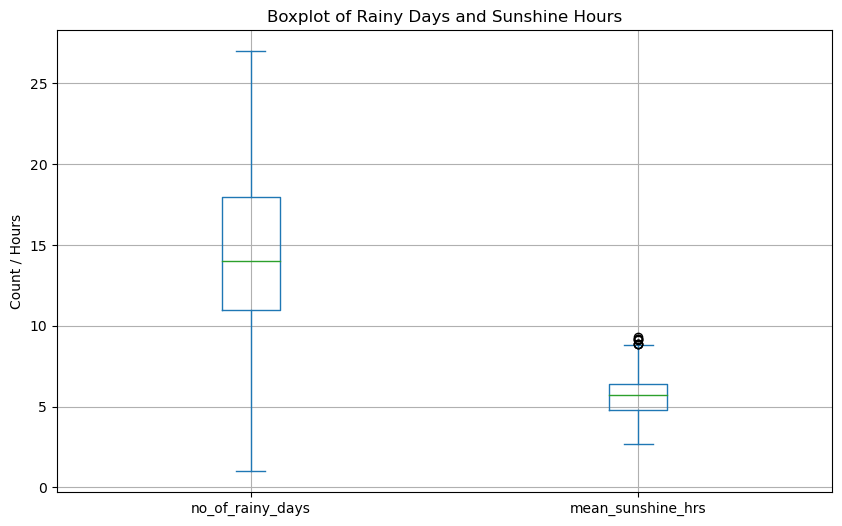

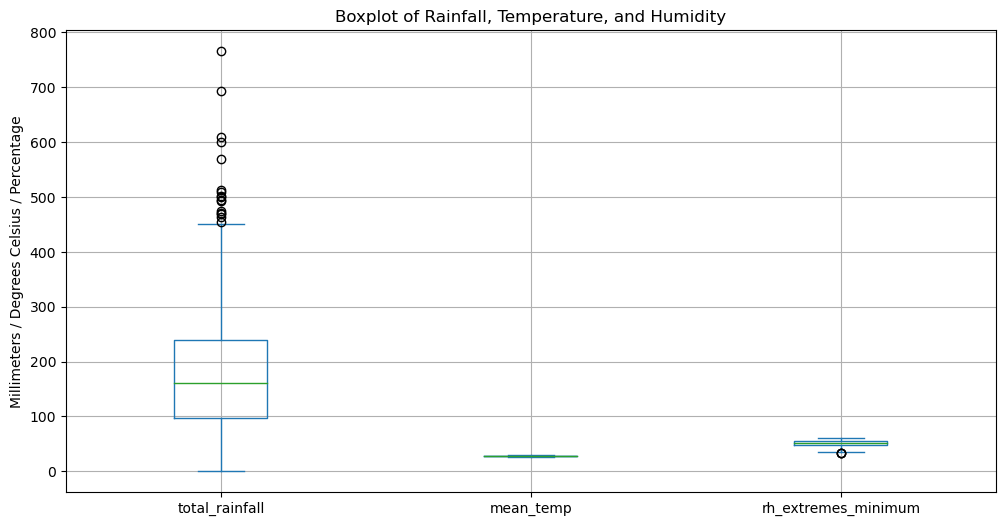

In [141]:
"""
3 Plot and interpret boxplots.
Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
Each boxplot should:
Only include variables of a similar scale
Have clear labels for each variable
Have appropriate titles and labels

"""

"""
Given the dataset, focus on:
- Rainy days and mean sunshine hours (they have different units but their ranges can be considered on a smaller scale)
- Total rainfall, mean temperature, and minimum relative humidity (considering their potential for a wider range of values)

"""
# For plotting with pandas, we'll create two boxplots: one for small scale features and another for large scale features

# Small scale features: 'no_of_rainy_days', 'mean_sunshine_hrs'
# Large scale features: 'total_rainfall', 'mean_temp', 'rh_extremes_minimum'

# Plotting boxplots for small scale features using pandas
merged_dataset_final[['no_of_rainy_days', 'mean_sunshine_hrs']].plot(kind='box', figsize=(10, 6), title='Boxplot of Rainy Days and Sunshine Hours')
plt.ylabel('Count / Hours')
plt.grid(True)
plt.show()

# Plotting boxplots for large scale features using pandas
merged_dataset_final[['total_rainfall', 'mean_temp', 'rh_extremes_minimum']].plot(kind='box', figsize=(12, 6), title='Boxplot of Rainfall, Temperature, and Humidity')
plt.ylabel('Millimeters / Degrees Celsius / Percentage')
plt.grid(True)
plt.show()


## Conclusions and Recommendations

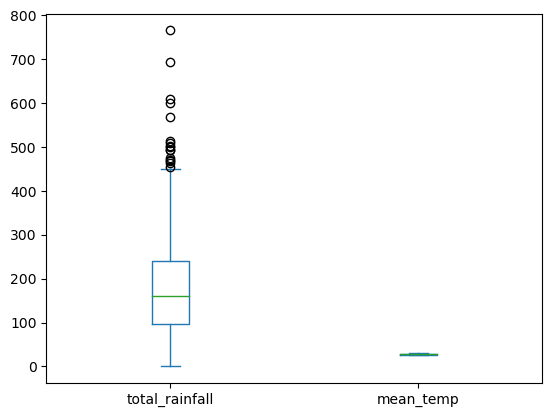

In [142]:
# Using pandas built-in function
merged_dataset_final[['total_rainfall', 'mean_temp']].plot(kind='box')
plt.show()


Boxplot of Rainy Days and Sunshine Hours
Rainy Days: The boxplot for the number of rainy days per month highlights the central tendency and variability within a limited range. The median is visibly centered, suggesting a balanced distribution across the dataset. Outliers are not prominently visible in this plot, indicating that extreme values are relatively rare for rainy days.

Sunshine Hours: Similarly, the sunshine hours per day show a distribution that may slightly lean towards higher values, given the median's position. The spread (IQR) is compact, suggesting consistent sunshine hours across different months. Outliers are minimal or absent, indicating uniformity in daily sunshine hours without significant deviations.

Boxplot of Rainfall, Temperature, and Humidity
Total Rainfall: The total rainfall boxplot reveals a broader spread and several outliers, indicating months with significantly higher rainfall than the median. This skewness towards higher values is typical for rainfall data, reflecting the occurrence of heavy rainfall or storm events.

Mean Temperature: The temperature distribution appears more symmetrical, with the median near the center of the box. The spread is moderate, indicating variability in mean monthly temperatures but within a consistent range. Few to no outliers suggest that extreme temperatures are uncommon within this dataset.

Minimum Relative Humidity: The relative humidity's boxplot may exhibit slight skewness, with the median closer to the box's upper end, indicating months with generally higher humidity levels. The presence of outliers would indicate occasional months with significantly different humidity levels from the norm.

General Observations
Central Tendency and Spread: Boxplots concisely display the median, quartiles, and outliers, offering a snapshot of each variable's distribution. Unlike histograms, boxplots clearly delineate the central tendency and the spread, making it easier to compare these aspects across variables.

Outliers Identification: Boxplots are particularly useful for spotting outliers, which are plotted as individual points. For instance, the total rainfall plot visibly identifies months with exceptional rainfall, highlighting the potential impact of extreme weather conditions.

Comparative Analysis: By plotting variables of similar scales together, we can directly compare their distributions. This approach facilitates an understanding of how different environmental factors might vary together or independently throughout the dataset.

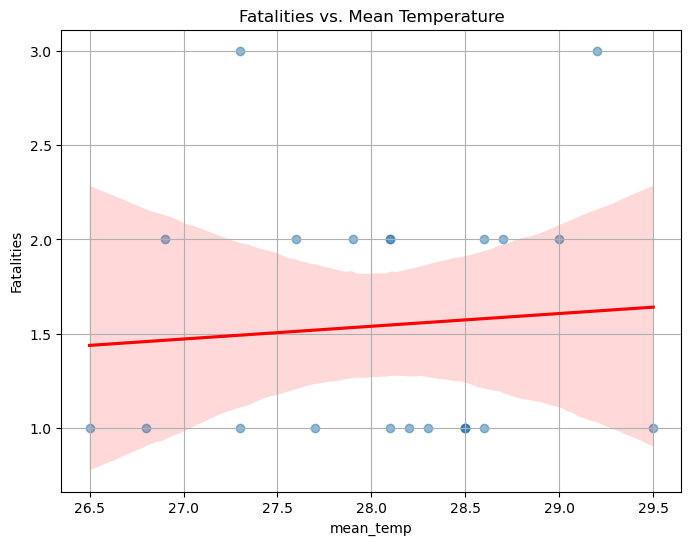

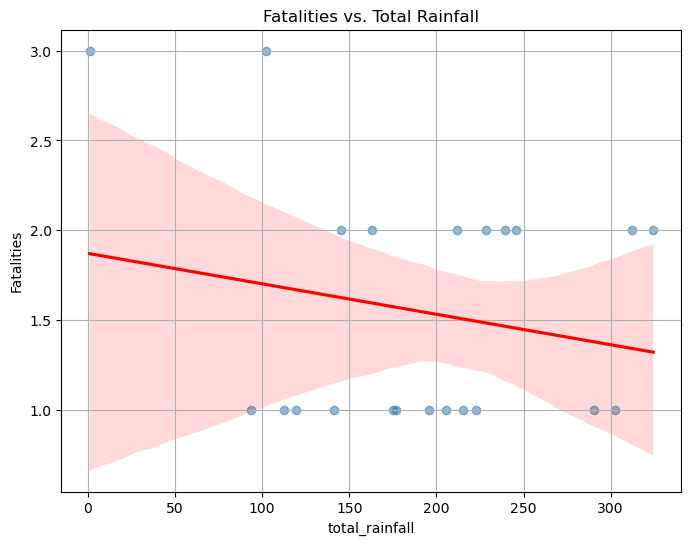

In [143]:
"""
Additional plots of your choosing.
Are there any additional trends or relationships you haven't explored?
Was there something interesting you saw that you'd like to dive further into?
It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward.
As always, make sure you're interpreting your plots as you go.

"""

# Define a function to plot scatter plots with a regression line for deeper insights
def plot_scatter_with_regression(dataframe, x, y, title=None):
    plt.figure(figsize=(8, 6))
    sns.regplot(data=dataframe, x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(title if title else f'{y} vs. {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

# Plotting Mean Temperature vs. Fatalities
plot_scatter_with_regression(merged_dataset_final, 'mean_temp', 'Fatalities', title='Fatalities vs. Mean Temperature')

# Plotting Total Rainfall vs. Fatalities
plot_scatter_with_regression(merged_dataset_final, 'total_rainfall', 'Fatalities', title='Fatalities vs. Total Rainfall')


The area in pink on the graph represents the confidence interval for the regression line. Specifically, it shows the range within which we can expect the true regression line to lie with a certain level of confidence (commonly 95%).

Regression Line (Red Line): This line represents the best fit through the data according to the regression model, suggesting the average relationship between the mean temperature and fatalities.

Confidence Interval (Pink Area): The shaded area around the regression line represents the confidence interval. It provides a range for the estimate of the mean value of the dependent variable (fatalities) for a given value of the independent variable (mean temperature). If you were to repeat the study many times, the true regression line would lie within this shaded area in 95% (or another confidence level, depending on how it was calculated) of those studies.

Interpretation: If the pink area is wide, it indicates that there is more uncertainty about the exact position of the true regression line. A narrower pink area would indicate that the estimates are more precise.


Fatalities vs. Mean Temperature
Observations: The scatter plot with a regression line suggests a very subtle positive trend between mean temperature and fatalities within the construction industry. However, the spread of data points and the relatively flat slope of the regression line indicate that the correlation is not strong. This suggests that while extreme temperatures may pose a risk, they are not a predominant factor in fatalities on their own.

Implications: The slight positive trend underscores the importance of heat safety measures in construction, especially on hot days, but also highlights that fatalities are likely influenced by a complex interplay of factors beyond just temperature.

Fatalities vs. Total Rainfall
Observations: This plot shows a slight negative trend, suggesting that higher total rainfall might correlate with fewer fatalities in the construction industry. The spread of the data and the regression line's slope indicate a weak relationship, with several data points deviating significantly from the trend.

Implications: The negative trend could reflect reduced construction activity during heavy rainfall, potentially leading to fewer accidents. However, the weak correlation and variability suggest that like temperature, rainfall on its own is not a strong predictor of fatalities. It may, however, be a factor worth considering in broader safety and operational planning, especially in regions prone to heavy rainfall.

Some ideas for plots that can be generated:

Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset.
Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?

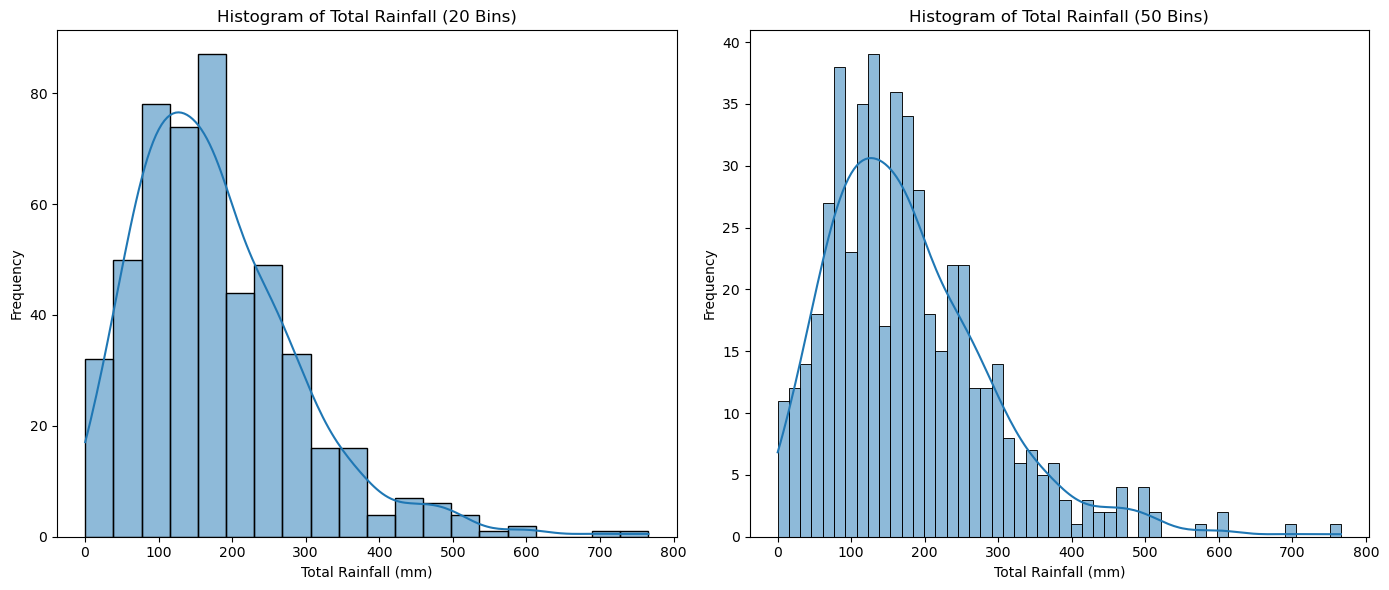

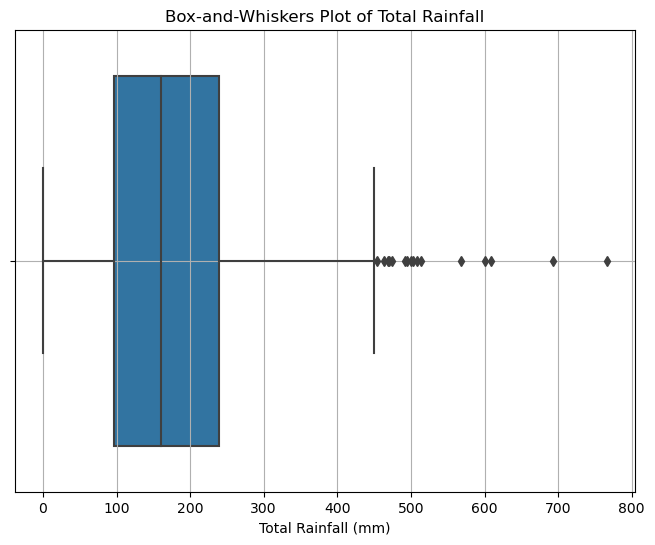

In [144]:
# Histogram of Rainfall Data with Various Bins
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_dataset_final['total_rainfall'], bins=20, kde=True)
plt.title('Histogram of Total Rainfall (20 Bins)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(merged_dataset_final['total_rainfall'], bins=50, kde=True)
plt.title('Histogram of Total Rainfall (50 Bins)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box-and-Whiskers Plot for Rainfall
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_dataset_final['total_rainfall'])
plt.title('Box-and-Whiskers Plot of Total Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()


Interpretation of Rainfall Data Visualizations
Histogram of Total Rainfall
Distribution Shape: The histograms with 20 and 50 bins reveal the distribution of total rainfall is right-skewed, indicating most months experience lower amounts of rainfall, while a smaller number of months see significantly higher totals. This skewness is a common characteristic in rainfall distributions, where extreme precipitation events are less frequent but can significantly impact the average.

Skewness and Center: The data is not symmetrically distributed around a central value; instead, it leans towards the right, showing that higher rainfall amounts, though less common, stretch the distribution tail. The presence of a peak on the lower end of the rainfall scale suggests that months with minimal to moderate rainfall are more frequent.

Box-and-Whiskers Plot of Total Rainfall
Quartiles and Median: The box plot clearly displays the median (the line within the box), which is closer to the lower quartile than the upper, further indicating a right-skewed distribution. The interquartile range (IQR) – the box's length – shows the middle 50% of the data, highlighting the spread of most rainfall amounts.

Outliers: The plot showcases several outliers beyond the upper whisker, representing months with exceptionally high rainfall. These points stand out from the general distribution and signify extreme precipitation events that could be critical for industries sensitive to weather conditions, like construction.

Data Spread: The whiskers extend from the box to show the range of the data, excluding outliers. The distance between the whiskers and the outliers emphasizes the variability in extreme rainfall events compared to more common monthly totals.

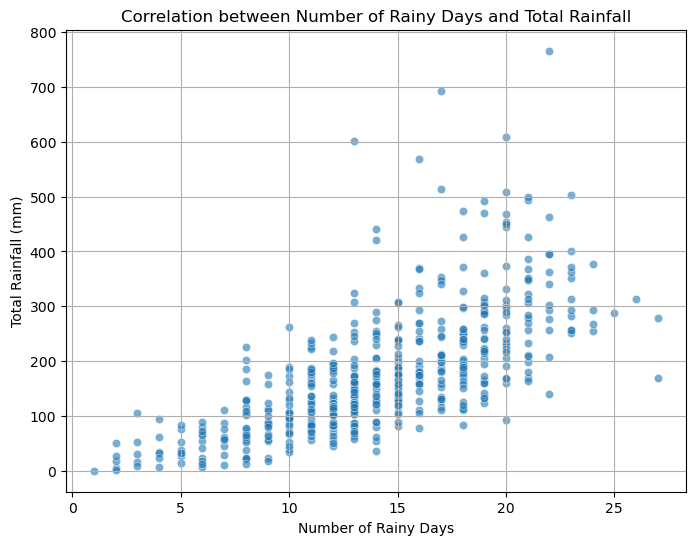

In [145]:
# Plot 3: Scatter Plot for Correlation Analysis between Number of Rainy Days and Total Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_dataset_final, x='no_of_rainy_days', y='total_rainfall', alpha=0.6)
plt.title('Correlation between Number of Rainy Days and Total Rainfall')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()


Correlation between Number of Rainy Days and Total Rainfall
Observation: The scatter plot shows a positive correlation between the number of rainy days and total rainfall. As the number of rainy days increases, total rainfall tends to increase as well, which aligns with intuition.
Correlation Type: The relationship appears to be linear, suggesting that the total rainfall is directly proportional to the number of rainy days. The data points are somewhat spread out, indicating variability in how much rain falls on rainy days, but the overall trend is clear.
Graph Confirmation: The scatter plot confirms the suspected positive linear correlation between these two variables. The pattern observed in the graph is consistent with the expectation that more rainy days within a month lead to higher total rainfall amounts.

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

The scatter plots analyzing the relationship between fatalities in the construction industry and both mean temperature and total rainfall reveal nuanced correlations.

For mean temperature, a slight positive correlation suggests that higher temperatures might marginally increase the risk of fatalities, though the relationship is not strong, indicating that extreme heat alone is not a major contributing factor to fatalities. This observation emphasizes the need for effective heat safety measures on construction sites during warmer periods, while also acknowledging that fatalities result from a complex mix of conditions beyond just temperature.

In contrast, the relationship between total rainfall and fatalities shows a mild negative trend, implying that months with more rainfall tend to have fewer fatalities. This might be due to decreased construction activity during periods of heavy rain, leading to fewer accidents. However, the weak correlation and notable data variability indicate that rainfall, similar to temperature, is not a direct predictor of fatalities.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!